<a href="https://colab.research.google.com/github/AmitSP-beep/Classification-Model/blob/main/Project02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Basic Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Dataset**

In [2]:
df=pd.read_csv('/content/drive/MyDrive/datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


**General Idea about Data**

In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Checking data type for columns in dataset**

In [4]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


**Some variables in the dataset may lack relevance to the target variable, providing little to no insightful information. Identifying and excluding these variables can enhance the overall analysis by focusing on those that meaningfully contribute to understanding the factors influencing the target outcome.**

In [5]:
df1=df.drop(['EmployeeCount','EmployeeNumber','Over18'],axis=1)
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**The remaining columns in the dataset provide valuable information related to the target variable. However, we should be cautious of potential multicollinearity among these variables, which could impact the analysis. We will address this issue in the later stages of our analysis to ensure robust model performance and interpretation.**

**Checking for NA values**


In [6]:
df1.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


**As there is no NA in Data lets start encoding the data using OneHotEncoding**

In [7]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
tf1=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse_output=False,drop='first'),['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'])


                                    ],remainder='drop'
       )
encoded=tf1.fit_transform(df1)
df2=pd.DataFrame(encoded,columns=tf1.get_feature_names_out())
df2

,ohe__Attrition_Yes,ohe__BusinessTravel_Travel_Frequently,ohe__BusinessTravel_Travel_Rarely,ohe__Department_Research & Development,ohe__Department_Sales,ohe__EducationField_Life Sciences,ohe__EducationField_Marketing,ohe__EducationField_Medical,ohe__EducationField_Other,ohe__EducationField_Technical Degree,...,ohe__JobRole_Laboratory Technician,ohe__JobRole_Manager,ohe__JobRole_Manufacturing Director,ohe__JobRole_Research Director,ohe__JobRole_Research Scientist,ohe__JobRole_Sales Executive,ohe__JobRole_Sales Representative,ohe__MaritalStatus_Married,ohe__MaritalStatus_Single,ohe__OverTime_Yes
0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


**Let's join the two dataframes encoded and rest numerical columns**

In [8]:
df_n=df1.drop(['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'],axis=1)
df_n
new_df=pd.concat([df_n,df2],axis=1)
new_df


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,ohe__JobRole_Laboratory Technician,ohe__JobRole_Manager,ohe__JobRole_Manufacturing Director,ohe__JobRole_Research Director,ohe__JobRole_Research Scientist,ohe__JobRole_Sales Executive,ohe__JobRole_Sales Representative,ohe__MaritalStatus_Married,ohe__MaritalStatus_Single,ohe__OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,40,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,39,613,6,1,4,42,2,3,1,9991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,27,155,4,3,2,87,4,2,2,6142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [9]:
new_df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'ohe__Attrition_Yes', 'ohe__BusinessTravel_Travel_Frequently',
       'ohe__BusinessTravel_Travel_Rarely',
       'ohe__Department_Research & Development', 'ohe__Department_Sales',
       'ohe__EducationField_Life Sciences', 'ohe__EducationField_Marketing',
       'ohe__EducationField_Medical', 'ohe__EducationField_Other',
       'ohe__EducationField_Technical Degree', 'ohe__Gender_Male',
       'ohe__JobRole_Human Resources', 'ohe__JobRole_Laboratory Technician',
       'ohe__Jo

**Now let's start outlier detection**

- **Age**

<function matplotlib.pyplot.show(close=None, block=None)>

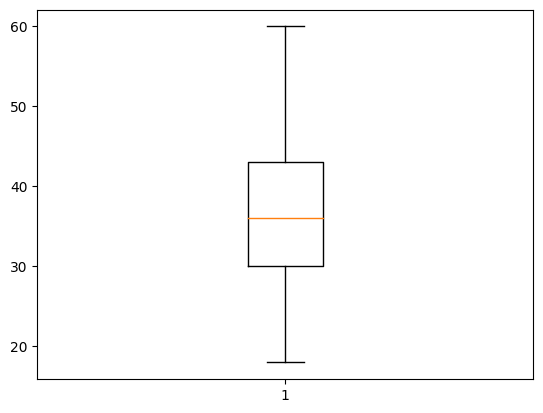

In [10]:
plt.boxplot(new_df['Age'])
plt.show

- **DailyRate**

<function matplotlib.pyplot.show(close=None, block=None)>

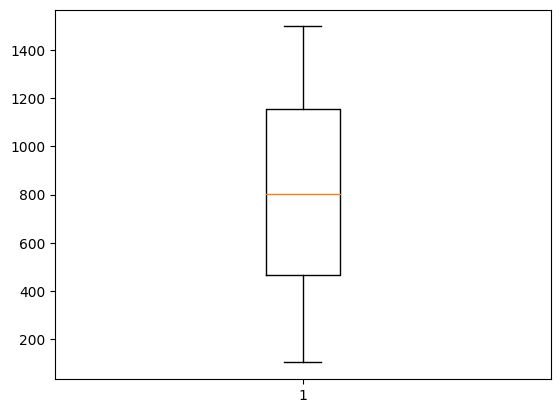

In [11]:
plt.boxplot(new_df['DailyRate'])
plt.show

- **DistanceFromHome**

<function matplotlib.pyplot.show(close=None, block=None)>

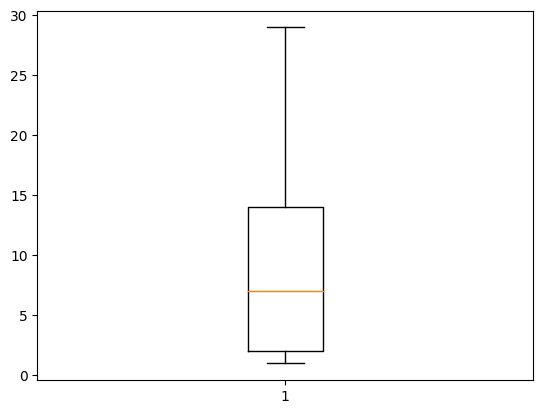

In [12]:
plt.boxplot(new_df['DistanceFromHome'])
plt.show

- **HourlyRate**

<function matplotlib.pyplot.show(close=None, block=None)>

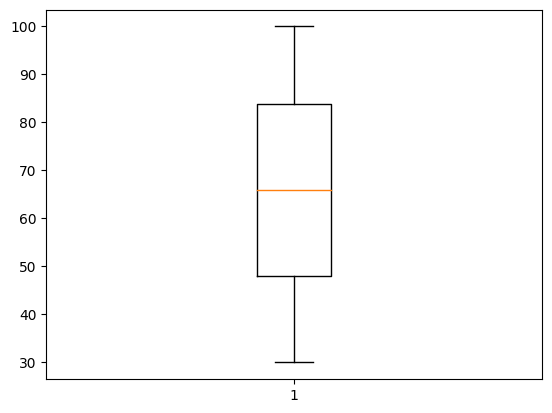

In [13]:
plt.boxplot(new_df['HourlyRate'])
plt.show

- **MonthlyIncome**

<function matplotlib.pyplot.show(close=None, block=None)>

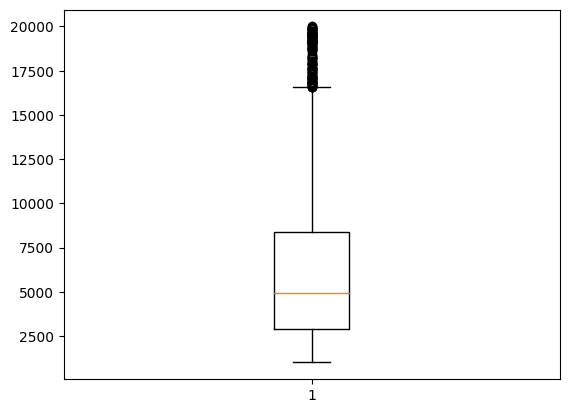

In [14]:
plt.boxplot(new_df['MonthlyIncome'])
plt.show

**Analysing Outliers for above plot**

<function matplotlib.pyplot.show(close=None, block=None)>

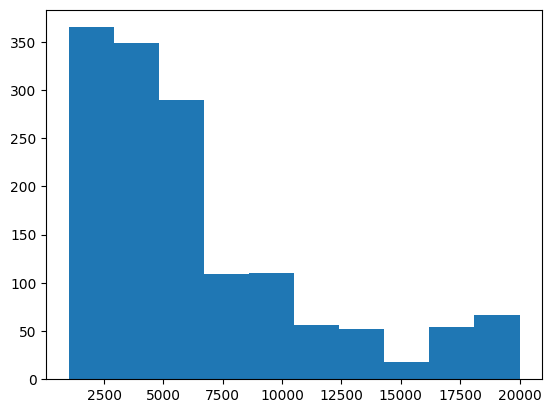

In [15]:
plt.hist(new_df['MonthlyIncome'])
plt.show

**Even though they are outliers but they  are genuine data points, we’ll retain them during the Exploratory Data Analysis (EDA) to preserve the integrity of the dataset. However, during regression modeling, we can apply transformations (like log or square root) to mitigate their influence on the coefficients. This approach allows us to balance the inclusion of real data while minimizing the potential distortion caused by extreme values on the model's performance and interpretation.**

- **MonthalyRate**

<function matplotlib.pyplot.show(close=None, block=None)>

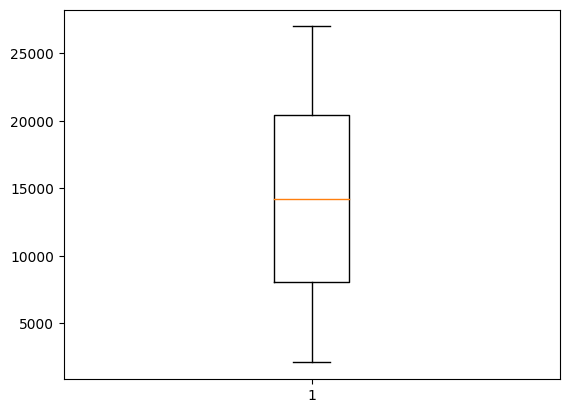

In [16]:
plt.boxplot(new_df['MonthlyRate'])
plt.show

- **PercentageHike**

<function matplotlib.pyplot.show(close=None, block=None)>

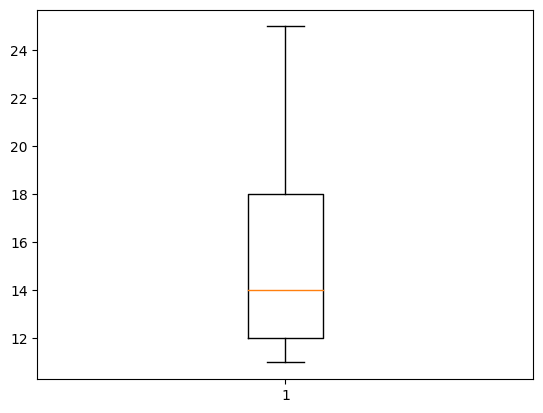

In [17]:
plt.boxplot(new_df['PercentSalaryHike'])
plt.show

- **StandardHours**

<function matplotlib.pyplot.show(close=None, block=None)>

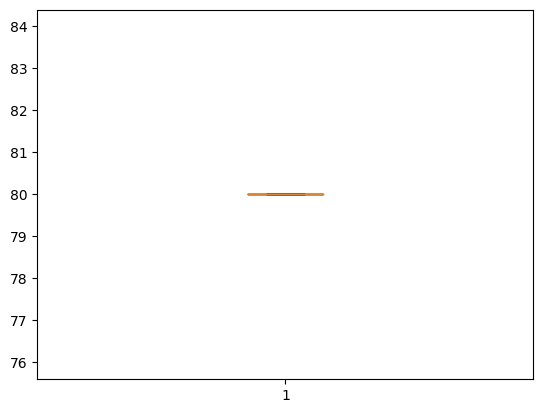

In [18]:
plt.boxplot(new_df['StandardHours'])
plt.show

- **YearsAtCompany**

<function matplotlib.pyplot.show(close=None, block=None)>

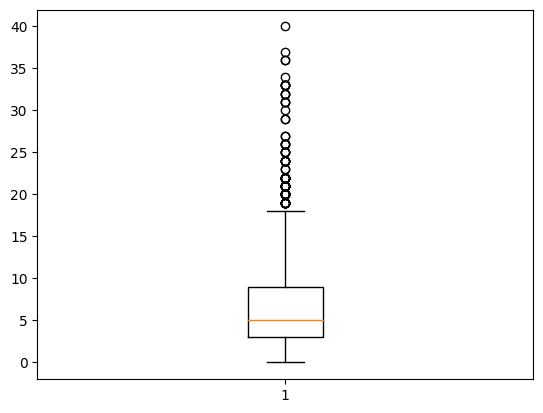

In [19]:
plt.boxplot(new_df['YearsAtCompany'])
plt.show

**We can comment same to the outliers of these column as of MonthlyIncome**

- **TotalWorkingHours**

<function matplotlib.pyplot.show(close=None, block=None)>

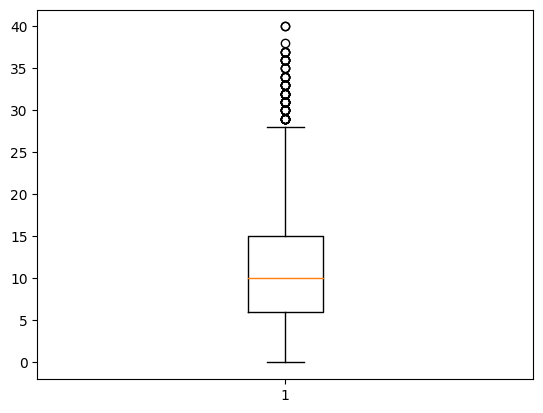

In [20]:
plt.boxplot(new_df['TotalWorkingYears'])
plt.show

**These outliers are also genuine data points so we'll control them while model fitting but let's keep them in EDA**

- **YearsWithCurrentManager**

<function matplotlib.pyplot.show(close=None, block=None)>

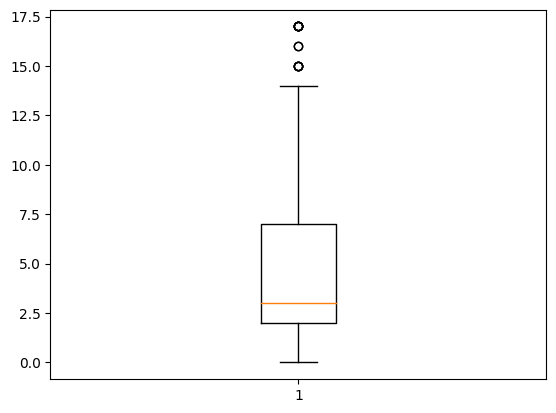

In [21]:
plt.boxplot(new_df['YearsWithCurrManager'])
plt.show

**Based on the boxplots, it is evident that there are no significant outliers in our data. Therefore, we can confidently proceed with the Exploratory Data Analysis (EDA).**

**Now let's plot pairplot for getting general idea about numeric columns of our data**

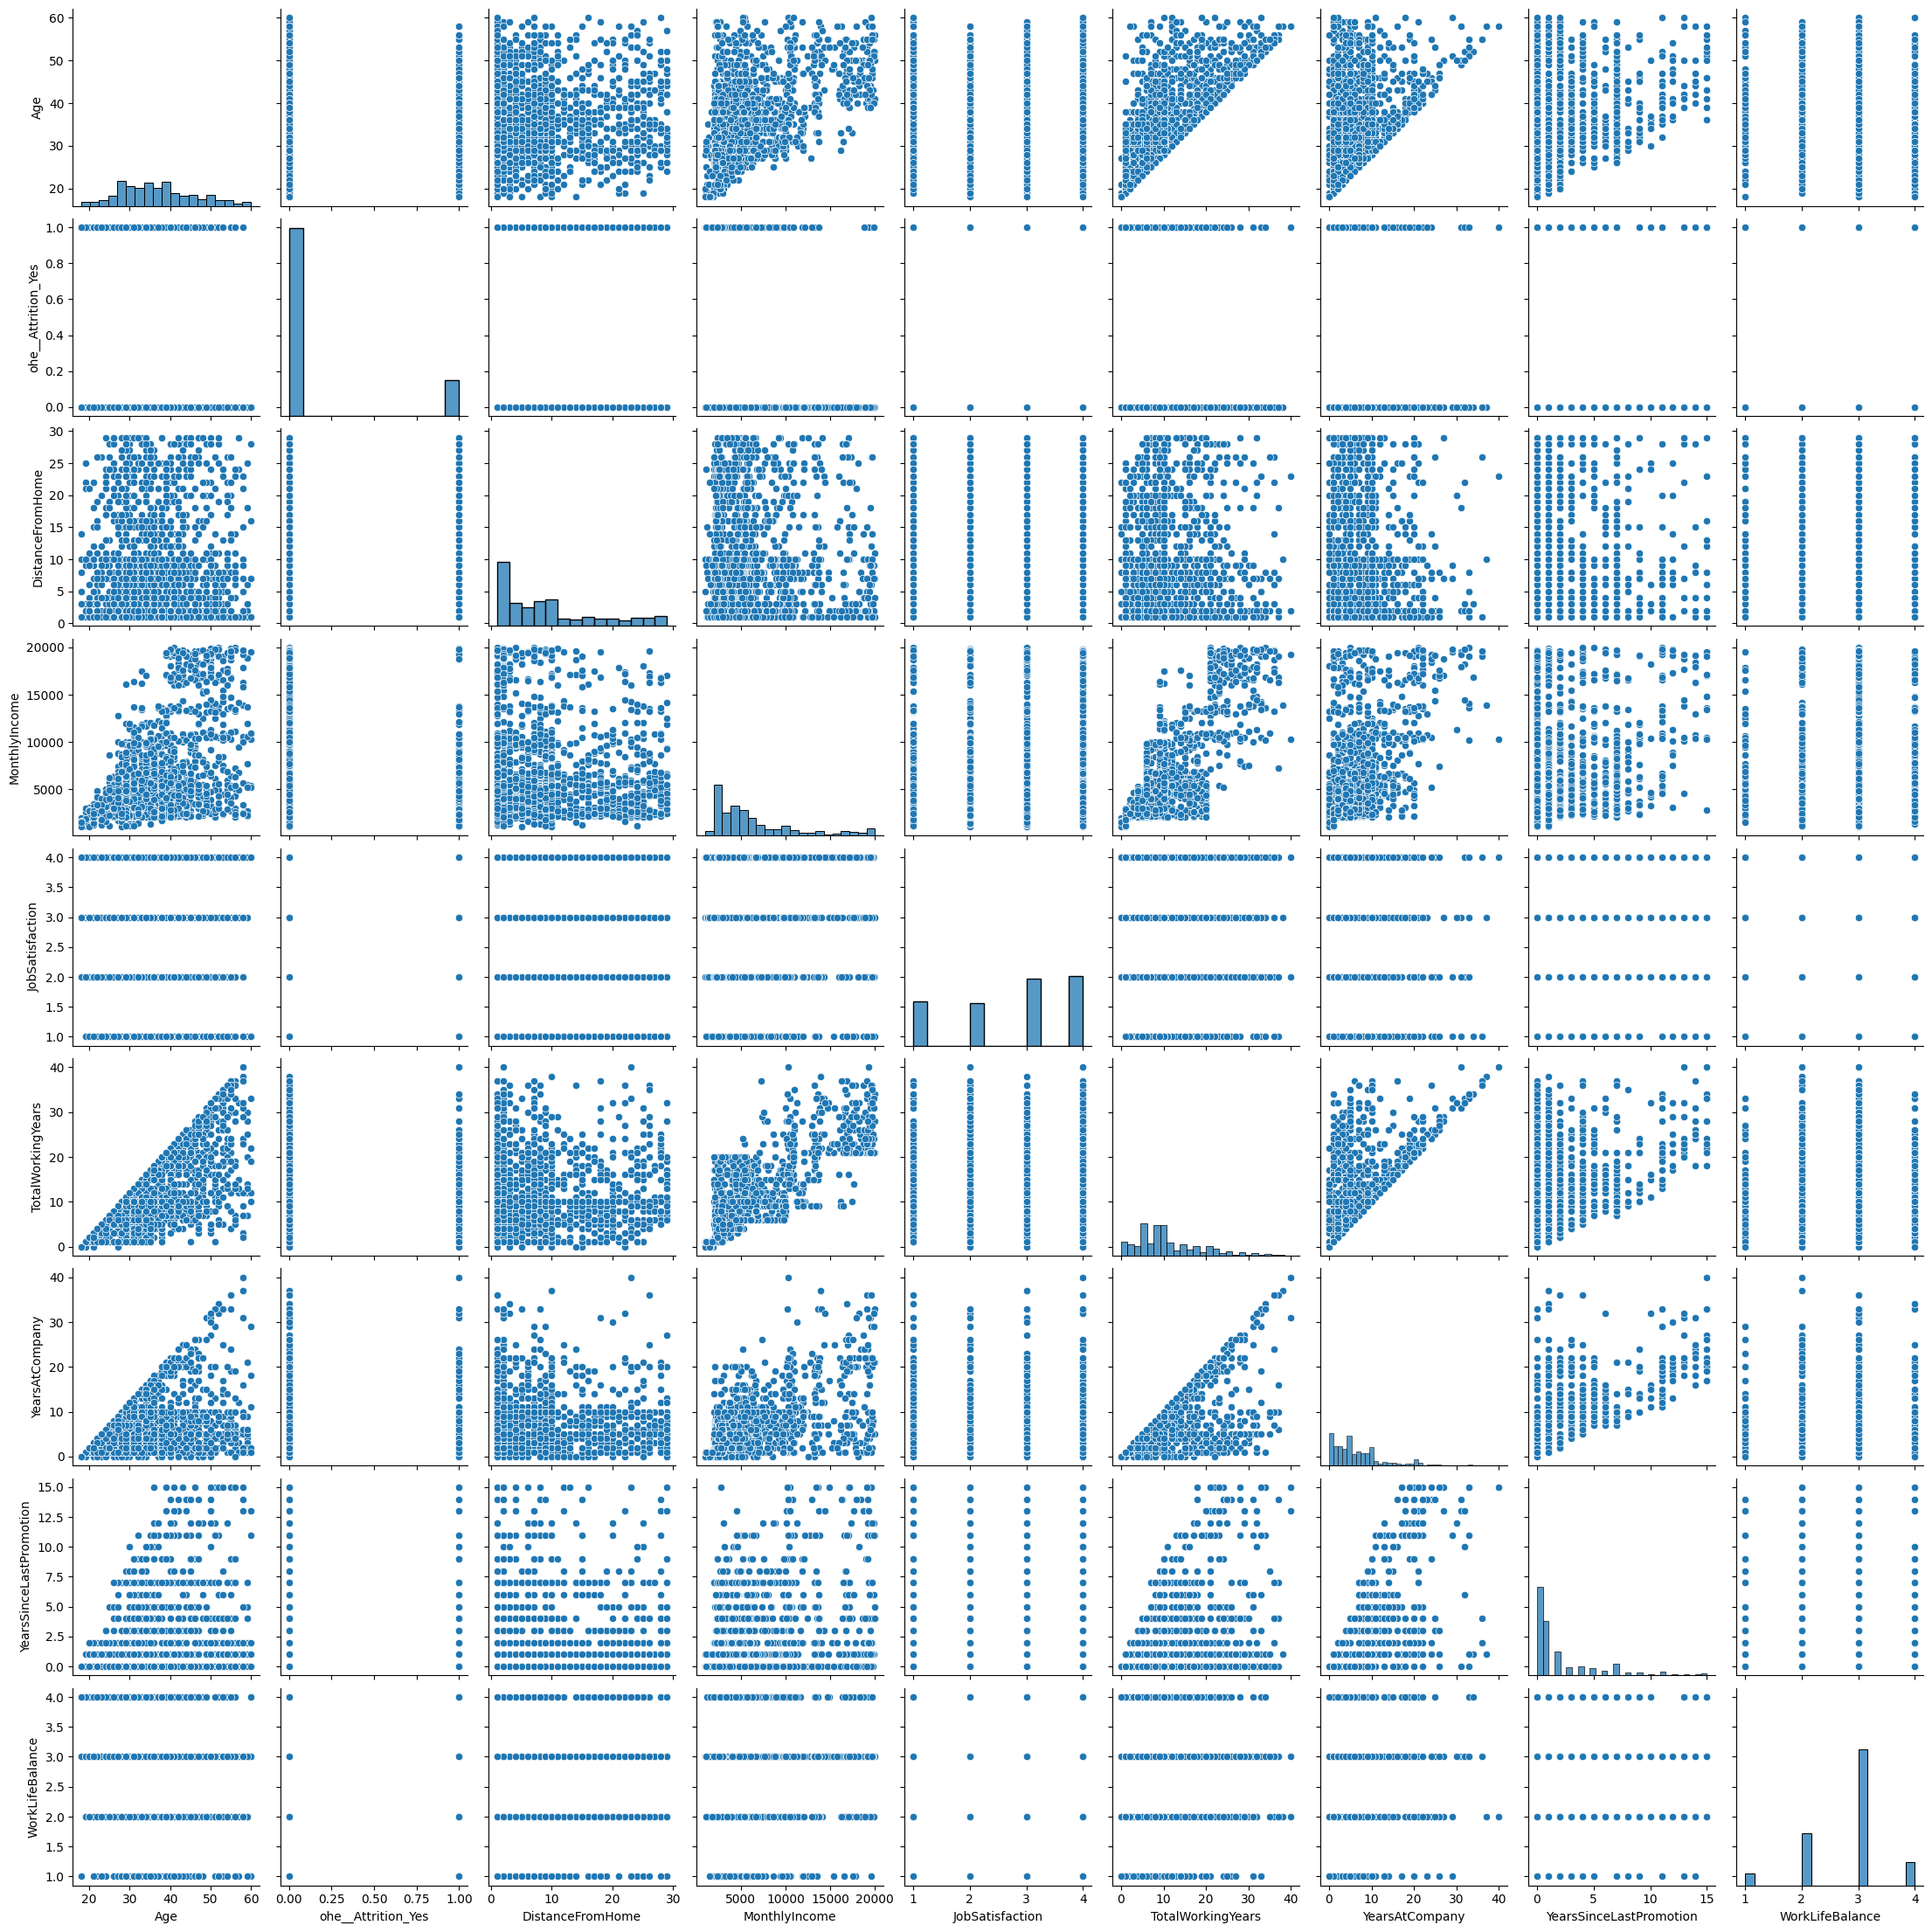

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(new_df[['Age', 'ohe__Attrition_Yes', 'DistanceFromHome', 'MonthlyIncome',
                 'JobSatisfaction', 'TotalWorkingYears', 'YearsAtCompany',
                 'YearsSinceLastPromotion', 'WorkLifeBalance']],
             )

plt.show()


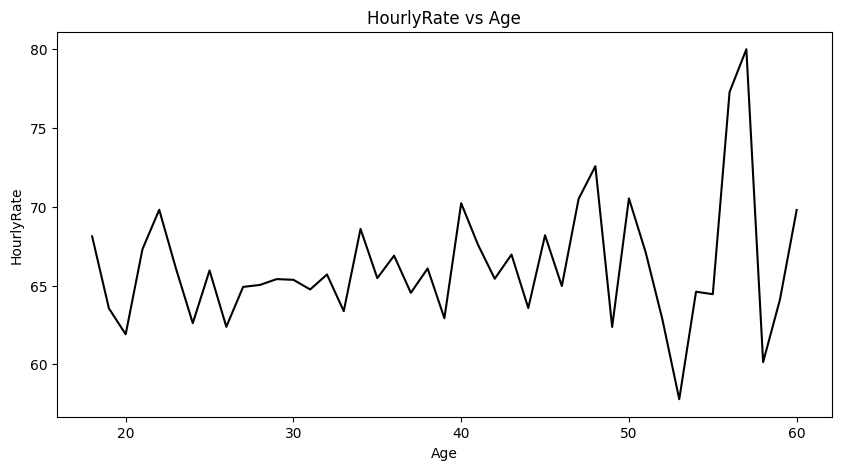

In [23]:
gr_age=new_df.groupby('Age')['HourlyRate'].mean().reset_index()
gr_age
plt.figure(figsize=(10,5))
sns.lineplot(x='Age',y='HourlyRate',color='black',data=gr_age)
plt.xlabel('Age')
plt.ylabel('HourlyRate')
plt.title('HourlyRate vs Age')

plt.show()


**There's a fair amount of fluctuation in hourly rates across ages, with no clear trend such as a consistent increase or decrease. This suggests that hourly rates are fairly variable regardless of age.**

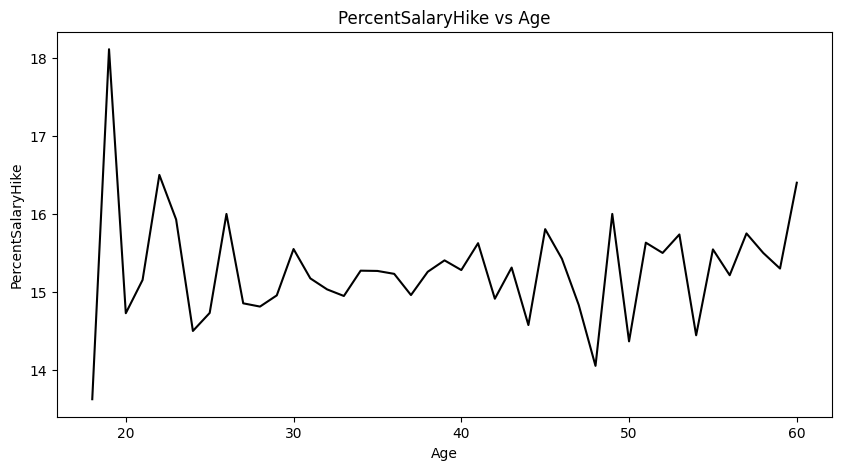

In [24]:
gr_age2=new_df.groupby('Age')['PercentSalaryHike'].mean().reset_index()
gr_age
plt.figure(figsize=(10,5))
sns.lineplot(x='Age',y='PercentSalaryHike',color='black',data=gr_age2)
plt.xlabel('Age')
plt.ylabel('PercentSalaryHike')
plt.title('PercentSalaryHike vs Age')

plt.show()


**There is an initial increase in the percentage of salary hikes associated with age, followed by a subsequent decline. This trend may be driven by a desire to attract and retain talent in the early stages of a career, suggesting that younger employees receive more significant raises to incentivize their engagement and loyalty.**

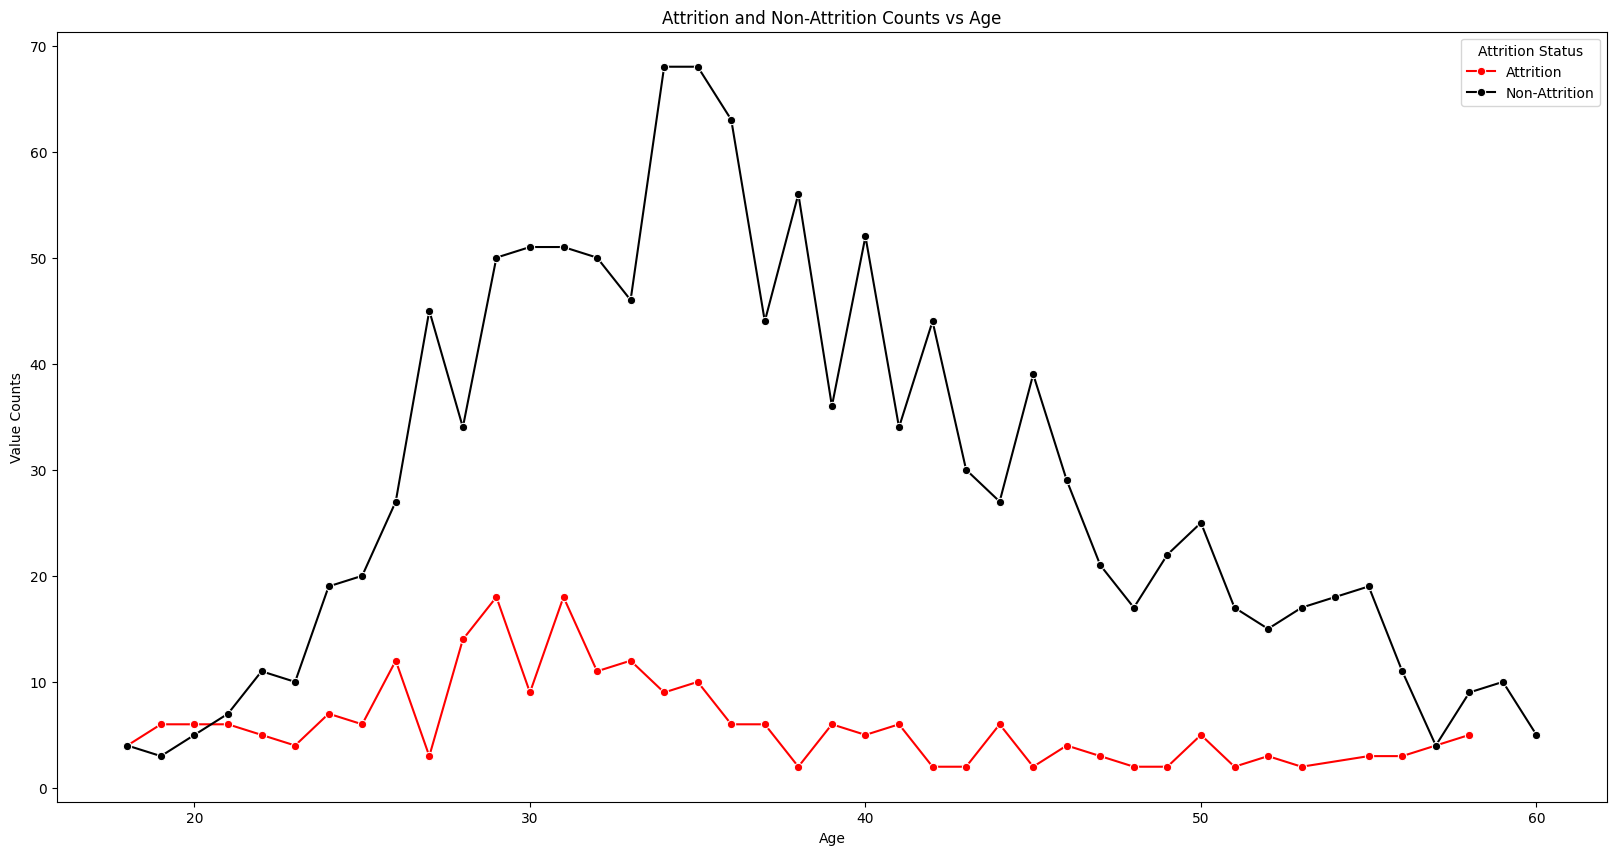

In [25]:
gr_age3 = new_df.groupby(['Age', 'ohe__Attrition_Yes']).size().reset_index(name='Count')

dff1 = gr_age3[gr_age3['ohe__Attrition_Yes'] == 1]
dff2 = gr_age3[gr_age3['ohe__Attrition_Yes'] == 0]

plt.figure(figsize=(20, 10))

sns.lineplot(data=dff1, x='Age', y='Count', label='Attrition', color='Red', marker='o')

sns.lineplot(data=dff2, x='Age', y='Count', label='Non-Attrition', color='Black', marker='o')
plt.xlabel('Age')
plt.ylabel('Value Counts')
plt.title('Attrition and Non-Attrition Counts vs Age')
plt.legend(title='Attrition Status')
plt.show()

- **Young employees (20-30)**:

 Attrition rates are relatively low, but gradually increase up to the early 30s. Non-attrition counts also rise, indicating that younger employees are more likely to stay, though some attrition occurs as career paths become more defined.

- **Mid-career employees (30-40)**:

 Non-attrition peaks around age 35, suggesting that individuals in this age group, likely experiencing more stability in their personal lives (e.g., marriage, family), are less likely to leave. Attrition is relatively stable but lower than non-attrition.

- **Older employees (40+)**:

 Both attrition and non-attrition steadily decrease with age, though attrition remains consistently lower across all age groups. This could imply that older employees either stay due to job security or exit the workforce for retirement or other reasons.

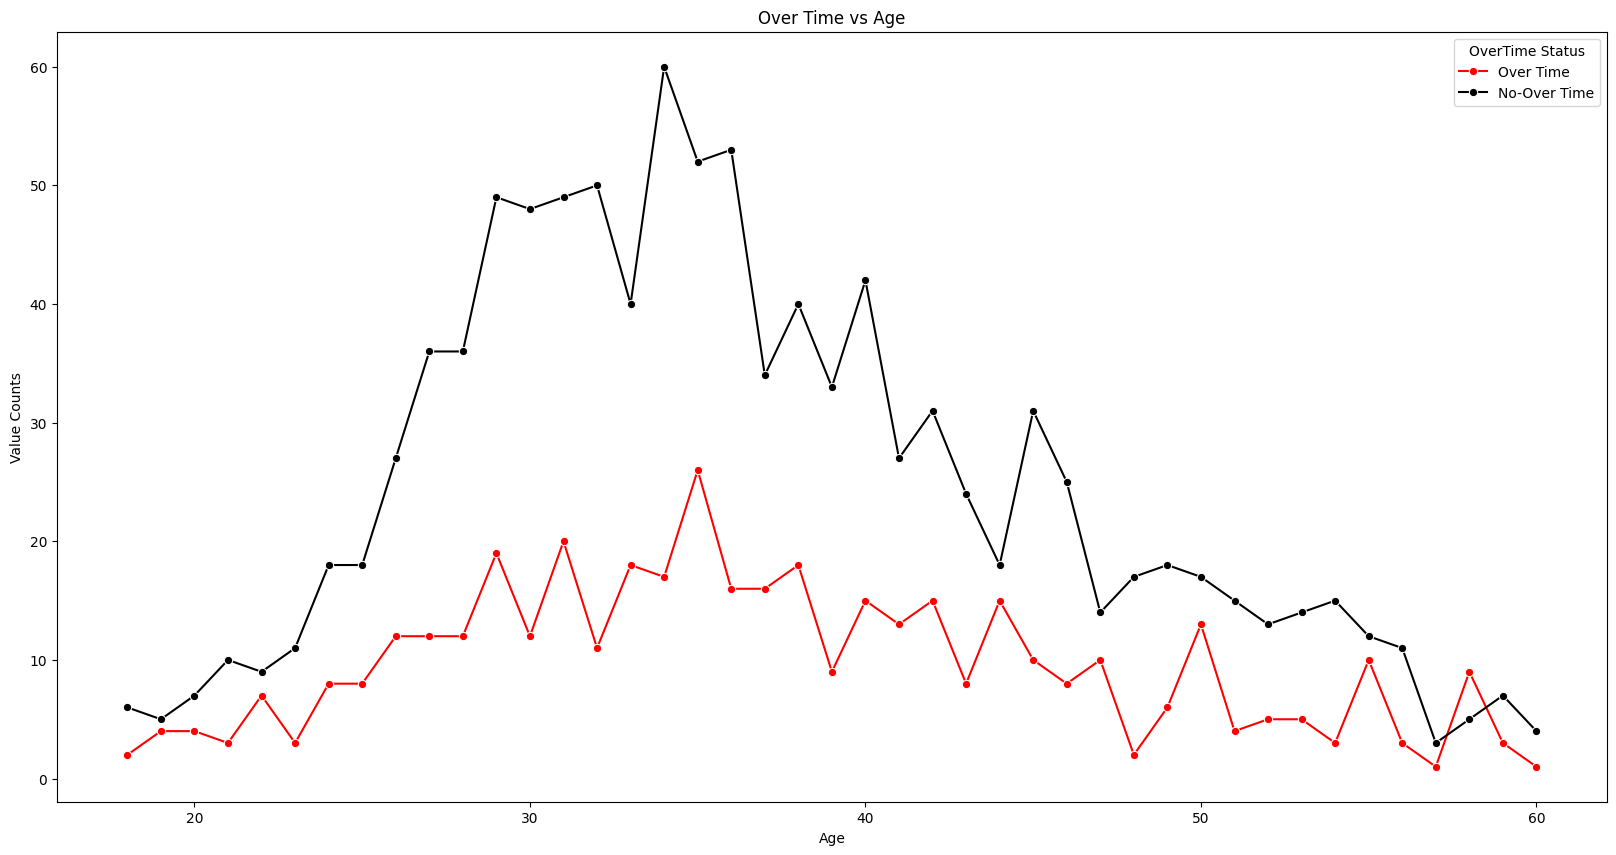

In [26]:
gr_age4 = new_df.groupby(['Age', 'ohe__OverTime_Yes']).size().reset_index(name='Count')

dff3 = gr_age4[gr_age4['ohe__OverTime_Yes'] == 1]
dff4 = gr_age4[gr_age4['ohe__OverTime_Yes'] == 0]

plt.figure(figsize=(20, 10))

sns.lineplot(data=dff3, x='Age', y='Count', label='Over Time', color='Red', marker='o')

sns.lineplot(data=dff4, x='Age', y='Count', label='No-Over Time', color='Black', marker='o')
plt.xlabel('Age')
plt.ylabel('Value Counts')
plt.title('Over Time vs Age')
plt.legend(title='OverTime Status')
plt.show()

- **Young employees (20-30)**:

 Overtime and no-overtime counts both rise, with a higher number of employees not doing overtime. However, there is still a noticeable proportion of younger employees engaging in overtime.

- **Mid-career employees (30-40)**:

 No-overtime counts peak around age 35, suggesting that many employees in this age group, likely due to personal responsibilities or increased stability, do not engage in overtime. The overtime counts are also relatively high in this age range, showing a balanced split between those opting for overtime and those who do not.

- **Older employees (40+)**:

  Both overtime and no-overtime counts gradually decrease after age 40, but no-overtime remains consistently higher. This indicates that as employees age, they are less likely to work overtime, possibly due to nearing retirement or reduced need for extra work hours.